In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler

In [3]:
CHD_data=pd.read_csv("CHDdata.csv")

In [4]:
CHD_data

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1
...,...,...,...,...,...,...,...,...,...,...
457,214,0.40,5.98,31.72,Absent,64,28.45,0.00,58,0
458,182,4.20,4.41,32.10,Absent,52,28.61,18.72,52,1
459,108,3.00,1.59,15.23,Absent,40,20.09,26.64,55,0
460,118,5.40,11.61,30.79,Absent,64,27.35,23.97,40,0


In [5]:
CHD_data.shape

(462, 10)

In [6]:
CHD_data["chd"].value_counts()

chd
0    302
1    160
Name: count, dtype: int64

In [7]:
CHD_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sbp        462 non-null    int64  
 1   tobacco    462 non-null    float64
 2   ldl        462 non-null    float64
 3   adiposity  462 non-null    float64
 4   famhist    462 non-null    object 
 5   typea      462 non-null    int64  
 6   obesity    462 non-null    float64
 7   alcohol    462 non-null    float64
 8   age        462 non-null    int64  
 9   chd        462 non-null    int64  
dtypes: float64(5), int64(4), object(1)
memory usage: 36.2+ KB


In [8]:
CHD_data.describe()

,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,chd
count,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000
mean,138.326840,3.635649,4.740325,25.406732,53.103896,26.044113,17.044394,42.816017,0.346320
std,20.496317,4.593024,2.070909,7.780699,9.817534,4.213680,24.481059,14.608956,0.476313
min,101.000000,0.000000,0.980000,6.740000,13.000000,14.700000,0.000000,15.000000,0.000000
25%,124.000000,0.052500,3.282500,19.775000,47.000000,22.985000,0.510000,31.000000,0.000000
50%,134.000000,2.000000,4.340000,26.115000,53.000000,25.805000,7.510000,45.000000,0.000000
75%,148.000000,5.500000,5.790000,31.227500,60.000000,28.497500,23.892500,55.000000,1.000000
max,218.000000,31.200000,15.330000,42.490000,78.000000,46.580000,147.190000,64.000000,1.000000


In [9]:
CHD_data.isnull().sum()

sbp          0
tobacco      0
ldl          0
adiposity    0
famhist      0
typea        0
obesity      0
alcohol      0
age          0
chd          0
dtype: int64

In [11]:
CHD_data=CHD_data.dropna()
CHD_data

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1
...,...,...,...,...,...,...,...,...,...,...
457,214,0.40,5.98,31.72,Absent,64,28.45,0.00,58,0
458,182,4.20,4.41,32.10,Absent,52,28.61,18.72,52,1
459,108,3.00,1.59,15.23,Absent,40,20.09,26.64,55,0
460,118,5.40,11.61,30.79,Absent,64,27.35,23.97,40,0


In [13]:
CHD_data.replace({'famhist':{'Absent':0,'Present':1}},inplace=True)

In [14]:
X = CHD_data.drop('chd', axis=1)
Y = CHD_data.loc[:, 'chd']

In [15]:
# Feature Importance :
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

### Apply SelectKBest Algorithm
ordered_rank_features=SelectKBest(score_func=chi2,k=9)
ordered_feature=ordered_rank_features.fit(X,Y)

dfscores=pd.DataFrame(ordered_feature.scores_,columns=["Score"])
dfcolumns=pd.DataFrame(X.columns)

features_rank=pd.concat([dfcolumns,dfscores],axis=1)

features_rank.columns=['Features','Score']
features_rank.nlargest(15, 'Score')

,Features,Score
8,age,319.660239
1,tobacco,240.292763
3,adiposity,70.936827
7,alcohol,63.382016
0,sbp,51.802304
2,ldl,28.860271
4,famhist,20.030464
5,typea,8.903626
6,obesity,3.148763


In [68]:
X = CHD_data.drop(['chd','obesity'], axis=1)
Y = CHD_data.loc[:, 'chd']

In [69]:
X

,sbp,tobacco,ldl,adiposity,famhist,typea,alcohol,age
0,160,12.00,5.73,23.11,1,49,97.20,52
1,144,0.01,4.41,28.61,0,55,2.06,63
2,118,0.08,3.48,32.28,1,52,3.81,46
3,170,7.50,6.41,38.03,1,51,24.26,58
4,134,13.60,3.50,27.78,1,60,57.34,49
...,...,...,...,...,...,...,...,...
457,214,0.40,5.98,31.72,0,64,0.00,58
458,182,4.20,4.41,32.10,0,52,18.72,52
459,108,3.00,1.59,15.23,0,40,26.64,55
460,118,5.40,11.61,30.79,0,64,23.97,40


In [70]:
Y

0      1
1      1
2      0
3      1
4      1
      ..
457    0
458    1
459    0
460    0
461    1
Name: chd, Length: 462, dtype: int64

In [81]:
# SMOTE Technique:
from imblearn.combine import SMOTETomek
smote = SMOTETomek(random_state=0)
X_smote, y_smote = smote.fit_resample(X,Y)

In [82]:
# Counting before and after SMOTE:
from collections import Counter
print('Before SMOTE : ', Counter(Y))
print('After SMOTE  : ', Counter(y_smote))

Before SMOTE :  Counter({0: 302, 1: 160})
After SMOTE  :  Counter({1: 280, 0: 280})


In [83]:
X_smote

,sbp,tobacco,ldl,adiposity,famhist,typea,alcohol,age
0,160,12.000000,5.730000,23.110000,1,49,97.200000,52
1,144,0.010000,4.410000,28.610000,0,55,2.060000,63
2,118,0.080000,3.480000,32.280000,1,52,3.810000,46
3,170,7.500000,6.410000,38.030000,1,51,24.260000,58
4,142,4.050000,3.380000,16.200000,0,59,2.620000,38
...,...,...,...,...,...,...,...,...
555,169,6.558923,6.494697,35.031101,0,48,24.297643,57
556,149,13.383018,5.097022,29.293845,1,52,78.280802,54
557,112,10.197513,5.810848,28.677938,0,42,30.723675,51
558,156,2.443168,5.632648,25.189314,0,56,27.210142,50


In [84]:
y_smote

0      1
1      1
2      0
3      1
4      0
      ..
555    1
556    1
557    1
558    1
559    1
Name: chd, Length: 560, dtype: int64

In [85]:
scaler=StandardScaler()

In [86]:
scaler.fit(X_smote)

StandardScaler()

In [87]:
X_standardized_data=scaler.transform(X_smote)   

In [88]:
X_standardized_data

array([[ 0.98540963,  1.82865042,  0.40926149, ..., -0.43783213,
         3.2148755 ,  0.52150236],
       [ 0.20239524, -0.87004343, -0.24876068, ...,  0.17847116,
        -0.60794915,  1.29952478],
       [-1.07000315, -0.85428792, -0.7123672 , ..., -0.12968048,
        -0.53763232,  0.0971265 ],
       ...,
       [-1.36363355,  1.42294906,  0.44956421, ..., -1.15685263,
         0.54378729,  0.45077305],
       [ 0.78965603, -0.32238917,  0.36073128, ...,  0.28118837,
         0.40260983,  0.38004374],
       [ 3.23657601,  0.44496852, -0.80495129, ...,  1.51379495,
         1.36550504,  1.01660754]])

In [89]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_standardized_data, y_smote, test_size=0.1, random_state=42)

In [90]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(504, 8) (56, 8) (504,) (56,)


In [91]:
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, roc_auc_score, classification_report
from sklearn.model_selection import cross_val_score
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassPredictionError

def predict(ml_model):
    model = ml_model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print(f'Predictions: {pred}')
    print('\n')
    print(f'Training Score: {model.score(X_train, y_train)}')
    print('\n')
    print(f'Confusion Matrix:')
    print(f'{confusion_matrix(pred, y_test)}')
    print('\n')
    print("Classification Report:")
    print(classification_report(pred, y_test))
    print('\n')
    print(f'Accuracy Score: {accuracy_score(pred, y_test)}')
    print(f'Mean Squared Error: {mean_squared_error(pred, y_test)}')
    
        # Plot confusion matrix
    classes = ['CAD', 'No CAD']

    lr_cm= ConfusionMatrix(model, classes=classes, cmap='GnBu')

    lr_cm.fit(X_train, y_train)
    lr_cm.score(X_test, y_test)
    plt.show()
    
    print('\n')
    plt.show()

Predictions: [1 1 0 1 0 1 1 0 1 0 0 1 1 1 0 1 1 0 0 1 0 0 1 1 0 0 0 0 1 1 1 0 0 0 0 1 0
 1 0 1 1 0 0 0 1 0 0 1 0 0 1 0 1 1 1 0]


Training Score: 1.0


Confusion Matrix:
[[24  5]
 [ 6 21]]


Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.83      0.81        29
           1       0.81      0.78      0.79        27

    accuracy                           0.80        56
   macro avg       0.80      0.80      0.80        56
weighted avg       0.80      0.80      0.80        56



Accuracy Score: 0.8035714285714286
Mean Squared Error: 0.19642857142857142


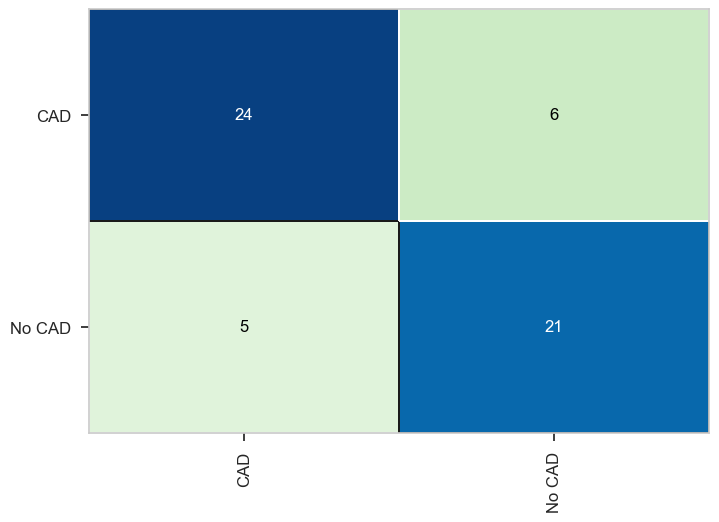

In [105]:
#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(random_state=7)

predict(forest)

Predictions: [1 1 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 0 0 1 0 0 1 1 0 1 0 0 1 1 1 0 0 0 0 1 0
 1 0 1 1 1 0 0 1 0 0 1 0 1 1 0 1 1 0 0]


Training Score: 0.8293650793650794


Confusion Matrix:
[[19  7]
 [11 19]]


Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.73      0.68        26
           1       0.73      0.63      0.68        30

    accuracy                           0.68        56
   macro avg       0.68      0.68      0.68        56
weighted avg       0.69      0.68      0.68        56



Accuracy Score: 0.6785714285714286
Mean Squared Error: 0.32142857142857145


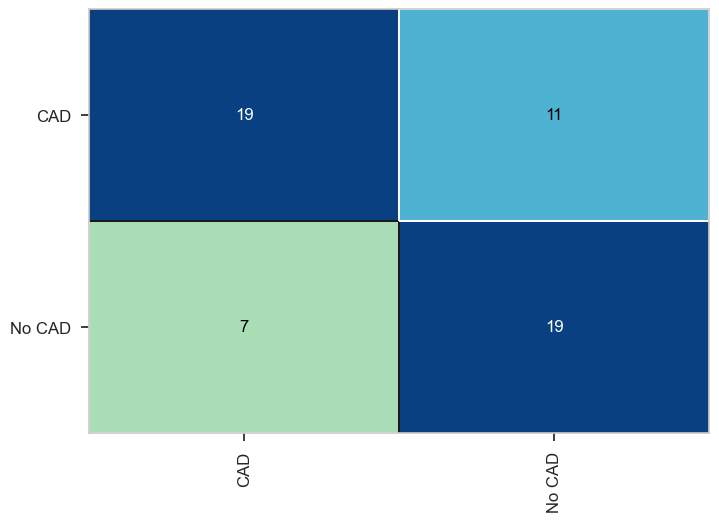

In [107]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(random_state=0)

predict(ada)

Predictions: [1 1 0 1 1 1 1 0 1 1 0 1 0 1 0 1 1 0 0 1 0 0 1 1 0 0 0 0 1 1 1 0 0 0 0 1 0
 1 0 1 1 0 1 1 1 0 0 1 0 0 1 0 1 1 0 0]


Training Score: 1.0


Confusion Matrix:
[[23  4]
 [ 7 22]]


Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.85      0.81        27
           1       0.85      0.76      0.80        29

    accuracy                           0.80        56
   macro avg       0.81      0.81      0.80        56
weighted avg       0.81      0.80      0.80        56



Accuracy Score: 0.8035714285714286
Mean Squared Error: 0.19642857142857142


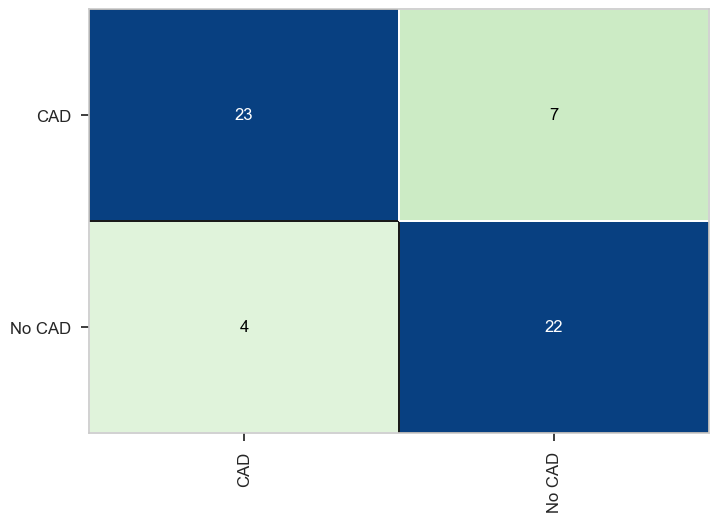

In [109]:
from sklearn.ensemble import ExtraTreesClassifier
etc=ExtraTreesClassifier(n_estimators=15, random_state=1,max_features="log2")
predict(etc)

Predictions: [1 1 0 1 0 0 1 0 1 1 0 1 1 1 0 1 0 0 0 1 0 0 1 1 0 1 0 0 1 1 1 0 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 1 1 0 1 1 0 0]


Training Score: 0.9503968253968254


Confusion Matrix:
[[20  7]
 [10 19]]


Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.74      0.70        27
           1       0.73      0.66      0.69        29

    accuracy                           0.70        56
   macro avg       0.70      0.70      0.70        56
weighted avg       0.70      0.70      0.70        56



Accuracy Score: 0.6964285714285714
Mean Squared Error: 0.30357142857142855


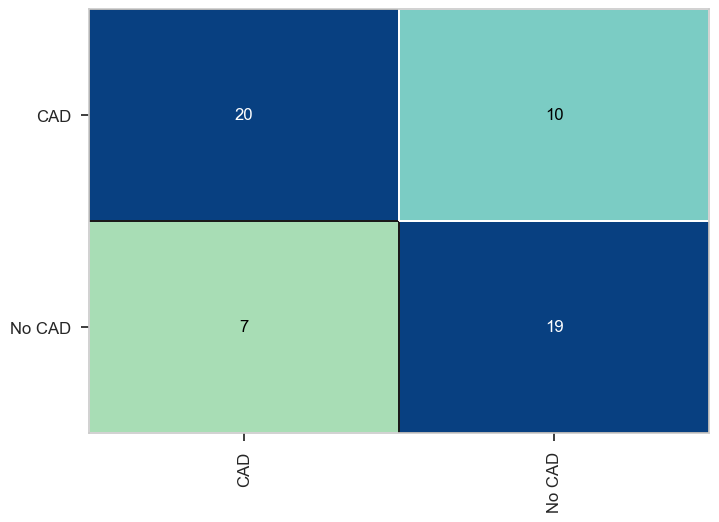

In [110]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier(random_state=5)
predict(gbc)

Predictions: [1 1 1 1 0 0 1 0 1 1 0 1 0 1 1 1 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1 1 0 0 0 1 1
 1 0 1 1 1 0 0 0 0 0 1 1 0 1 0 1 1 0 0]


Training Score: 1.0


Confusion Matrix:
[[20  7]
 [10 19]]


Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.74      0.70        27
           1       0.73      0.66      0.69        29

    accuracy                           0.70        56
   macro avg       0.70      0.70      0.70        56
weighted avg       0.70      0.70      0.70        56



Accuracy Score: 0.6964285714285714
Mean Squared Error: 0.30357142857142855


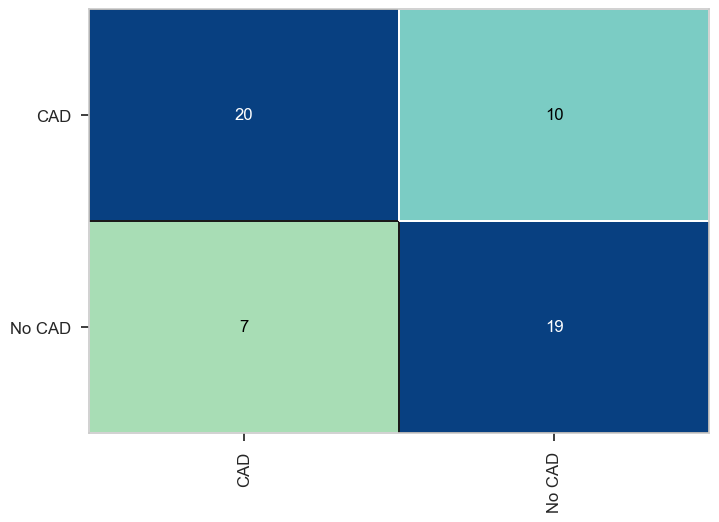

In [111]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(random_state = 2)
predict(dtc)

Predictions: [1 1 0 1 0 1 1 0 1 1 0 1 1 1 0 1 0 0 0 1 0 0 1 1 0 0 0 0 1 1 1 0 0 0 1 1 0
 1 0 1 1 1 1 0 1 0 0 1 0 1 0 0 1 1 0 0]


Training Score: 0.8075396825396826


Confusion Matrix:
[[22  5]
 [ 8 21]]


Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.81      0.77        27
           1       0.81      0.72      0.76        29

    accuracy                           0.77        56
   macro avg       0.77      0.77      0.77        56
weighted avg       0.77      0.77      0.77        56



Accuracy Score: 0.7678571428571429
Mean Squared Error: 0.23214285714285715


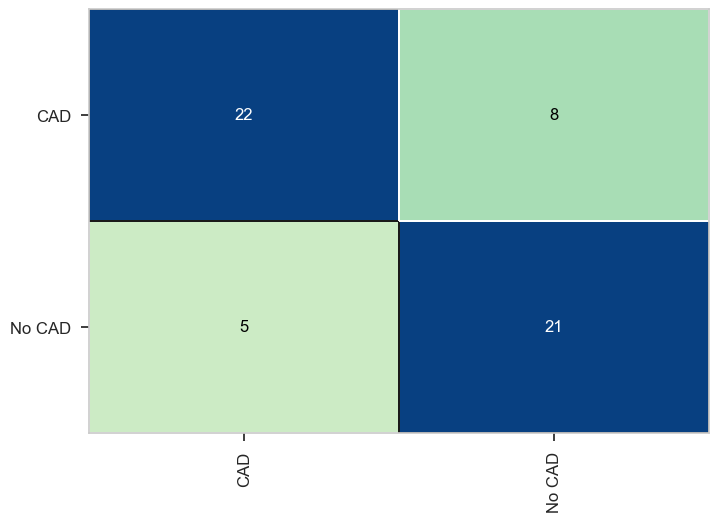

In [112]:
from sklearn.svm import SVC
svc = SVC(random_state=42)
predict(svc)

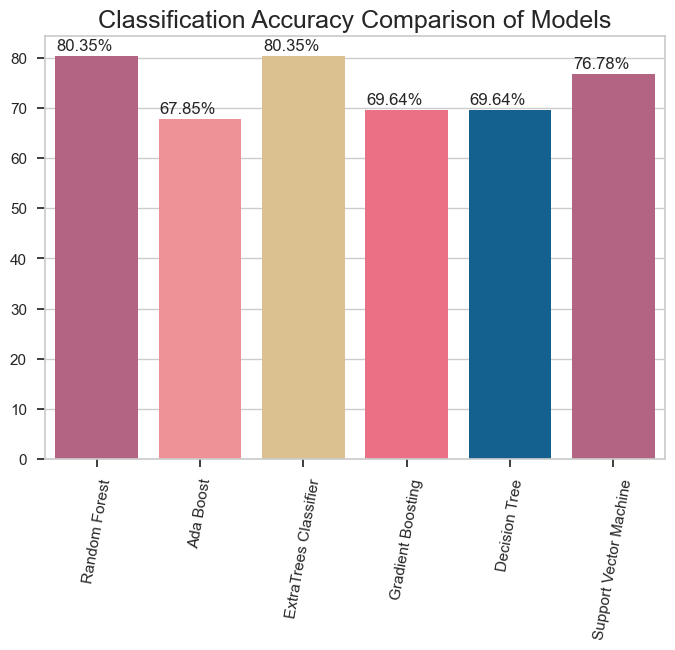

In [113]:
models_name=["Random Forest","Ada Boost","ExtraTrees Classifier","Gradient Boosting","Decision Tree","Support Vector Machine"]
score=[80.35,67.85,80.35,69.64,69.64,76.78]
sns.set(context='notebook', style=None)
ax = sns.barplot(x=models_name, y=score, palette=['#C05780','#FF828B','#E7C582','#FF5C77','#0065A2'])
ax.set_title('Classification Accuracy Comparison of Models', fontsize=18)
for item in ax.get_xticklabels():
    item.set_rotation(80)
for p in ax.patches:
        ax.annotate('{:}%'.format(p.get_height()), (p.get_x()+0.01, p.get_height()+1))

In [114]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(random_state=7)
forest.fit(X_train,y_train)

RandomForestClassifier(random_state=7)

In [117]:
#making a predictive system
input_data=(160,12,5.73,23.11,1,49,97.2,52)

#changing the input data to numpy array
input_data_as_numpy_array=np.asarray(input_data)

#reshape the array as we are predicting for one instance
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)

#standardize the input data
std_data=scaler.transform(input_data_reshaped)

prediction=forest.predict(std_data)
print(prediction)

if(prediction[0]==0):
    print("The person has no Coronary Heart Disease")
else:
    print("The person has Coronary Heart Disease.")

[1]
The person has Coronary Heart Disease.


In [118]:
#making a predictive system
input_data=(118,0.08,3.48,32.28,1,52,3.81,46)

#changing the input data to numpy array
input_data_as_numpy_array=np.asarray(input_data)

#reshape the array as we are predicting for one instance
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)

#standardize the input data
std_data=scaler.transform(input_data_reshaped)

prediction=forest.predict(std_data)
print(prediction)

if(prediction[0]==0):
    print("The person has no Coronary Heart Disease")
else:
    print("The person has Coronary Heart Disease.")

[0]
The person has no Coronary Heart Disease
